In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv(r'E:\Data Science\Projects\ML\pubg-finish-placement-prediction\data\train_V2.csv')
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
test = pd.read_csv(r'E:\Data Science\Projects\ML\pubg-finish-placement-prediction\data\test_V2.csv')
test.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [4]:
sample_submission = pd.read_csv(r'E:\Data Science\Projects\ML\pubg-finish-placement-prediction\data\sample_submission_V2.csv')
sample_submission.head()

,Id,winPlacePerc
0,9329eb41e215eb,1
1,639bd0dcd7bda8,1
2,63d5c8ef8dfe91,1
3,cf5b81422591d1,1
4,ee6a295187ba21,1


In [5]:
# NA values

col_wth_na = [col for col in train.columns if train[col].isnull().any()] 
max_na = pd.Series([train[i].isnull().sum() for i in col_wth_na], index = col_wth_na)
max_na.sort_values(ascending = False)

winPlacePerc    1
dtype: int64

In [6]:
train.dropna(inplace = True)
train.reset_index(drop = True, inplace = True)

In [7]:
# encoding

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [8]:
train['matchType'] = le.fit_transform(train['matchType'])

In [9]:
test['matchType'] = le.fit_transform(test['matchType'])

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446965 entries, 0 to 4446964
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        int32  
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [11]:
X = train.drop(['Id', 'groupId', 'matchId', 'rankPoints', 'winPlacePerc'], axis = 1)
y = train['winPlacePerc']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.3)

In [13]:
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [15]:
# XGBoost
regr = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=150, random_state = 0)
regr.fit(X_train, y_train)

# AdaBoost
adaregr = AdaBoostRegressor(random_state=0, learning_rate = 3, n_estimators=200)
adaregr.fit(X_train, y_train)

# Decision Tree
regressor_dt = DecisionTreeRegressor(random_state=0, max_depth = 10)
regressor_dt.fit(X_train,y_train)

# Random Forests
regr_rf = RandomForestRegressor(max_depth=15, random_state=0, n_estimators=25)
regr_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=25, random_state=0)

In [16]:
y_pred1 = regr.predict(X_test)                # XGBoost
y_pred2 = adaregr.predict(X_test)             # AdaBoost
y_pred3 = regressor_dt.predict(X_test)        # Decision Tree
y_pred4 = regr_rf.predict(X_test)             # Random Forests

In [17]:
print('The R^2 value for XGBoost Regressor is:', round((r2_score(y_test, y_pred1)), 3))
print('The R^2 value for AdaBoost Regressor is:', round((r2_score(y_test, y_pred2)), 3))
print('The R^2 value for Decision Tree Regressor is:', round((r2_score(y_test, y_pred3)), 3))
print('The R^2 value for Random Forests Regressor is  :', round((r2_score(y_test, y_pred4)), 3))

The R^2 value for XGBoost Regressor is: 0.925
The R^2 value for AdaBoost Regressor is: 0.796
The R^2 value for Decision Tree Regressor is: 0.899
The R^2 value for Random Forests Regressor is  : 0.926


In [18]:
print('The Adj R2 value for XGBoost Regressor is:', round((1 - (1 - r2_score(y_test, y_pred1)) * (len(y) - 1) / (len(y) - X.shape[1]-1)),3))
print('The Adj R2 value for AdaBoost Regressor is:', round((1 - (1 - r2_score(y_test, y_pred2)) * (len(y) - 1) / (len(y) - X.shape[1]-1)),3))
print('The Adj R2 value for Decision Tree Regressor is:', round((1 - (1 - r2_score(y_test, y_pred3)) * (len(y) - 1) / (len(y) - X.shape[1]-1)),3))
print('The Adj R2 value for Random Forests Regressor is:', round((1 - (1 - r2_score(y_test, y_pred4)) * (len(y) - 1) / (len(y) - X.shape[1]-1)),3))

The Adj R2 value for XGBoost Regressor is: 0.925
The Adj R2 value for AdaBoost Regressor is: 0.796
The Adj R2 value for Decision Tree Regressor is: 0.899
The Adj R2 value for Random Forests Regressor is: 0.926


In [19]:
MSE_xgb = mean_squared_error(y_test, y_pred1)
MSE_ada = mean_squared_error(y_test, y_pred2)
MSE_dt  = mean_squared_error(y_test, y_pred3)
MSE_rf  = mean_squared_error(y_test, y_pred4)

In [20]:
print('The RMSE value for XGBoost Regressor is        :', round(np.sqrt(MSE_xgb)));
print('The RMSE value for AdaBoost Regressor is       :', round(np.sqrt(MSE_ada)));
print('The RMSE value for Decision Tree Regressor is  :', round(np.sqrt(MSE_dt)));
print('The RMSE value for Random Forests Regressor is :', round(np.sqrt(MSE_rf)));

The RMSE value for XGBoost Regressor is        : 0.0
The RMSE value for AdaBoost Regressor is       : 0.0
The RMSE value for Decision Tree Regressor is  : 0.0
The RMSE value for Random Forests Regressor is : 0.0


Text(0.5, 1.0, 'Xgboost')

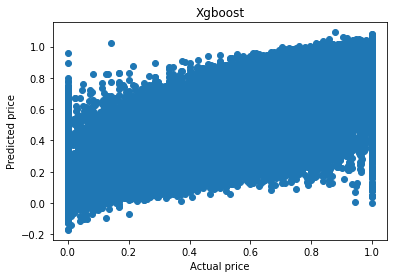

In [21]:
plt.scatter(y_test, y_pred1)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Xgboost")

Text(0.5, 1.0, 'Adaboost')

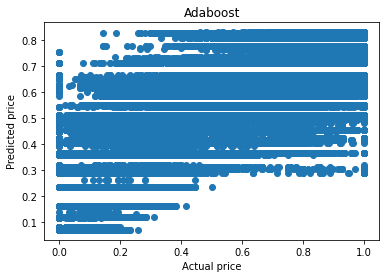

In [22]:
plt.scatter(y_test, y_pred2)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Adaboost")

Text(0.5, 1.0, 'Decision Tree')

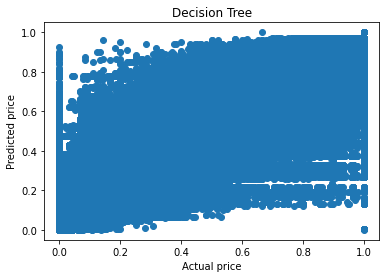

In [23]:
plt.scatter(y_test, y_pred3)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Decision Tree")

In [ ]:
regr_rf_result = RandomForestRegressor(max_depth=15, random_state=0, n_estimators=25)
regr_rf.fit(X, y)

In [25]:
result = regr_rf_result.predict(test.drop(['Id', 'groupId', 'matchId', 'rankPoints'], axis = 1))  

In [26]:
sample_submission['winPlacePerc'] = result

In [27]:
sample_submission.to_csv("sub_01.csv", index = 0)